# The Best Content for Data Science

Our goal in this project is to look for the following question: "What is it that people want to learn about in data science?"

# Exploring a Stack Exchange Website

**What kind of questions are welcome on this site?**

Exploring the Data Science Stack Exchange (DSSE), we could observed that technical and specific questions are welcome on this site. Questions like "best model to..." or "how to..." are pretty common.

**What, other than questions, does the site's home subdivide into?**

Besides questions, this site's home is subdivided into:
- Tags - a list of tags that categorizes the posts;
- Users - a list of usernames;
- Unanswered - a list of questions with no upvoted or accepted answers

Since we're searching for the best content to write about, The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

** What information is available in each post?**

- The Post's score;
- How many times the questions was seen;
- When the question was asked;
- The tags related to the question;
- When the question was edited (if it was);
- The username of who asked the question;
- The Answers's scores;
- The usernames of who answered;
- When the answer was edited (if it was).

# Stack Exchange Data Explorer

Since we're aiming interesting subjects of data science, after exploring and investigating the Database Schema, some titles stand out:
- Posts
- PostsTags
- Tags
- TagsSynonyms

Running a few exploratory queries, leads us to focus our efforts on Posts table. That's because we can track if the interest in tags is past or recent.

# Querying the Post Table

After exploring Post Table, we'll be focusing our attetion on columns that seem relevent towards our goal:
- **Id**: An identification number for the post;
- **PostTypeId**: An identification number for the type of post
- **CreationDate**: The date and time of creation of the post
- **Score**: The post's score;
- **ViewCount**: How many times the post was viewed
- **Tags**: What tags were used
- **AnswerCount**: How many answers the question got (only applicable to question posts)
- **FavoriteCount**: How many times the question was favored (only applicable to question posts)

Investigating the types of posts that could be relevant to us we'll ended up focus only on the questions (type 1).

The query used:

In [1]:
#SELECT PostTypeId, COUNT(*) as NrOfPosts
#FROM Posts
#GROUP BY PostTypeId
#ORDER BY 1;

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. Now, considering the columns listed above, recent posts, and only questions posts, we'll query (following below) and save it into a csv file named `2019_questions.csv`

In [2]:
#SELECT Id, 
       #PostTypeId, 
       #CreationDate, 
       #Score, 
       #ViewCount, 
       #Tags, 
       #AnswerCount, 
       #FavoriteCount
#FROM Posts
#WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019
#ORDER BY 1;

# Exploring the Data

Now we have a csv file, let's read and explore it.

In [3]:
import pandas as pd

posts = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
posts.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


# Dealing with Missing Values

Apparently the types of each column are adequate, except for the `FavoriteCount` one, as it has integer values, so it could be an `int` type. Also, it seems only `FavoriteCount` has missing values. Let's check this out if we can fix them:

In [5]:
posts['FavoriteCount'].value_counts(dropna=False)

NaN      7432
 1.0      953
 2.0      205
 0.0      175
 3.0       43
 4.0       12
 5.0        8
 6.0        4
 7.0        4
 11.0       1
 8.0        1
 16.0       1
Name: FavoriteCount, dtype: int64

We could assume that missing values mean no favorite marks, so we consider it as 0. Also we'll convert this column type to int64:

In [6]:
posts['FavoriteCount'] = posts['FavoriteCount'].fillna(0)
posts['FavoriteCount'] = posts['FavoriteCount'].astype('int')
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


# Transforming strings

Looking to the values of the `tags` column, we can see a non-suitable format to use string methods. We'll replace the separators to ",".

In [7]:
posts['Tags'] = posts['Tags'].str.replace("><", ",").str.replace("^<|>$", "").str.split(",")
posts['Tags'].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [8]:
posts.head(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0


# Tags Used x Viewed

Since we're focus on determining the most popular tags, we'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [9]:
#Creating a dictionary to store how many times each tag was used
tags_dict = {}
for tags in posts['Tags']:
    for tag in tags:
        if tag in tags_dict:
            tags_dict[tag] += 1
        else:
            tags_dict[tag] = 1

#Converting the dictionary into a DataFrame
data_items = tags_dict.items()
data_list = list(data_items)
df_times_used = pd.DataFrame(data_list, columns=['Tag', 'Times_Used'])
df_times_used.set_index('Tag', inplace=True)
df_times_used.index.name = None
df_times_used.sort_values(by='Times_Used', ascending=False, inplace=True)
times_used = df_times_used.head(20)
times_used

,Times_Used
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [10]:
#Creating a dictionary to store how many times each tag was viewed
views_dict = {}
for views, tags in zip(posts['ViewCount'], posts['Tags']):
    for tag in tags:
        if tag in views_dict:
            views_dict[tag] += views
        else:
            views_dict[tag] = views

#Converting the dictionary into a DataFrame
df_times_viewed = pd.DataFrame(list(views_dict.items()), columns=['Tag', 'Times_Viewed'])
df_times_viewed.set_index('Tag', inplace=True)
df_times_viewed.index.name = None
df_times_viewed.sort_values(by='Times_Viewed', ascending=False, inplace=True)
times_viewed = df_times_viewed.head(20)
times_viewed

,Times_Viewed
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


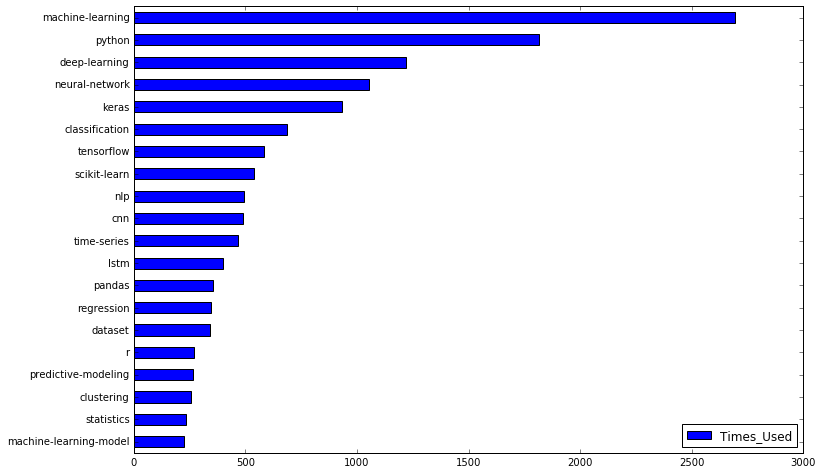

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
times_used.sort_values(by='Times_Used').plot(kind='barh', y='Times_Used', figsize=(12,8), color='blue')
plt.show()

Some tags are very broad and are unlikely to be useful; e.g.: python, dataset, r. Before we investigate the tags a little deeper, let's repeat the same process for views.

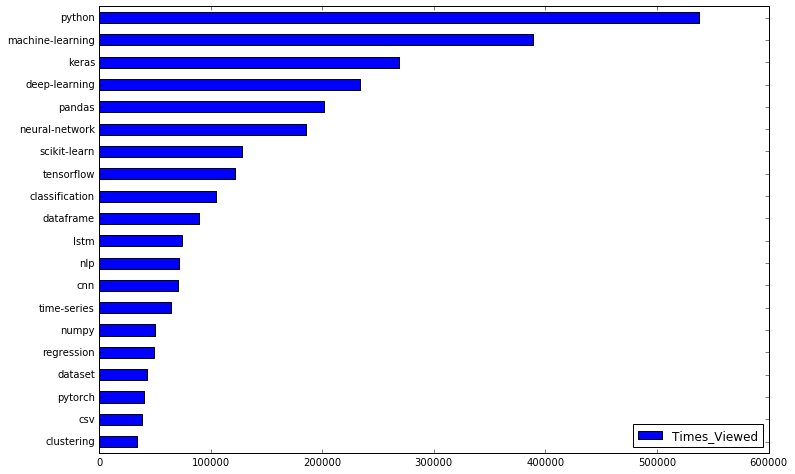

In [12]:
times_viewed.sort_values(by='Times_Viewed').plot(kind='barh', y='Times_Viewed', figsize=(12,8), color='blue')
plt.show()

Let's compare both graphs side by side:

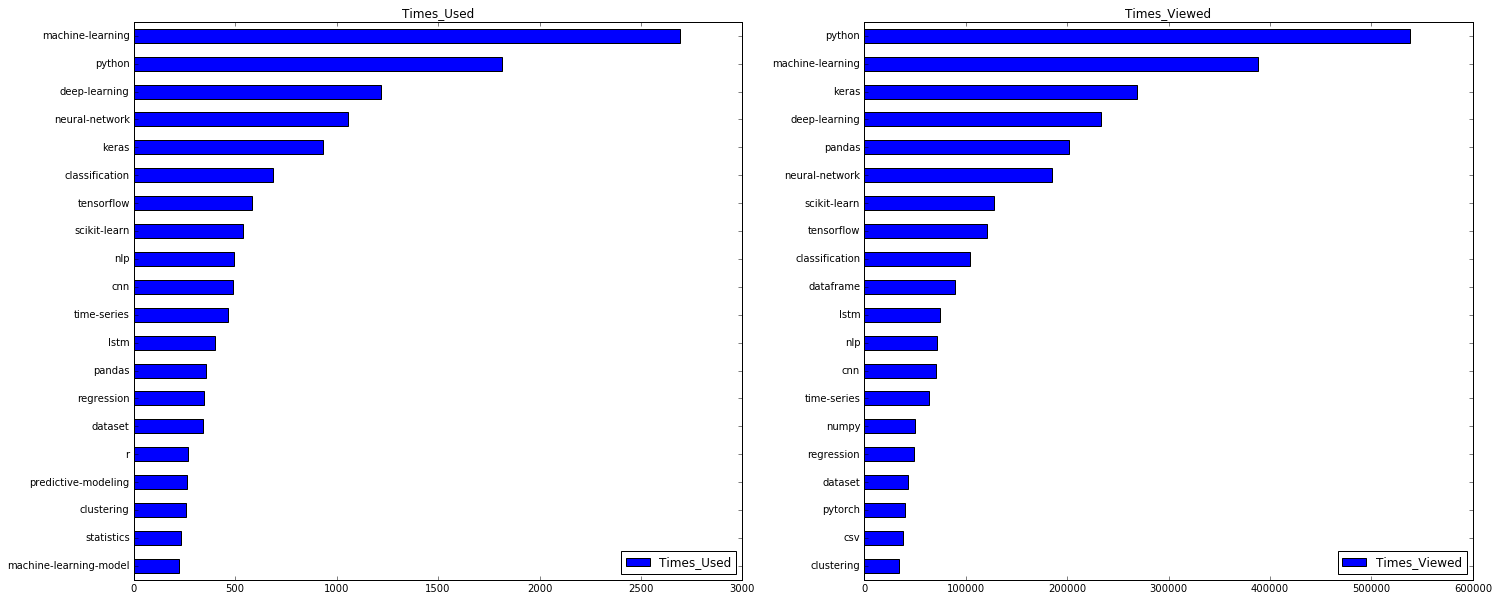

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
times_used.sort_values(by='Times_Used').plot(kind="barh", ax=axes[0], subplots=True)
times_viewed.sort_values(by='Times_Viewed').plot(kind="barh", ax=axes[1], subplots=True)
plt.show()

# Relations between Tags

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags.

In [14]:
all_tags = list(df_times_viewed.index)

Now, we'll going to create a dataframe that has all the tags in the list above in columns and index, in order to find relationships between pairs:

In [15]:
pair_tags = pd.DataFrame(columns=all_tags, index=all_tags)
#Filling all the NaN values to 0
pair_tags.fillna(0, inplace=True)
#Looping through 'Tags' column from posts. For each row, we'll associate
#each tag inside it 
for tags in posts['Tags']:
    pair_tags.loc[tags, tags] += 1
pair_tags

,python,machine-learning,keras,deep-learning,pandas,neural-network,scikit-learn,tensorflow,classification,dataframe,...,hurdle-model,paperspace,data-transfer,non-convex,frequentist,statsmodels,noisification,3d-object-detection,kitti-dataset,multivariate-distribution
python,1814,499,280,160,244,137,235,167,98,51,...,0,0,0,0,0,1,0,0,0,0
machine-learning,499,2693,195,429,62,366,188,106,259,6,...,0,0,0,0,0,0,0,0,0,0
keras,280,195,935,247,3,235,34,256,58,0,...,0,0,0,0,0,0,0,0,0,0
deep-learning,160,429,247,1220,1,305,16,136,59,0,...,0,0,0,0,0,0,0,1,1,0
pandas,244,62,3,1,354,1,37,3,3,60,...,0,0,0,0,0,0,0,0,0,0
neural-network,137,366,235,305,1,1055,24,108,65,0,...,0,0,0,0,0,0,0,0,0,0
scikit-learn,235,188,34,16,37,24,540,15,47,2,...,0,0,0,0,0,0,0,0,0,0
tensorflow,167,106,256,136,3,108,15,584,20,0,...,0,0,0,0,0,0,0,0,0,0
classification,98,259,58,59,3,65,47,20,685,1,...,0,0,0,0,0,0,0,0,0,0
dataframe,51,6,0,0,60,0,2,0,1,81,...,0,0,0,0,0,0,0,0,0,0


We will now filled this dataframe with zeroes and then, for each lists of tags in posts['Tags'], we incremented the intervening tags by one. The result is a dataframe that for each pair of tags, it tells us how many times they were used together.
This dataframe is quite large. Let's focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe.

In [16]:
relations_most_used = pair_tags.loc[times_used.index,times_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [17]:
import numpy as np
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i, i] = np.NaN

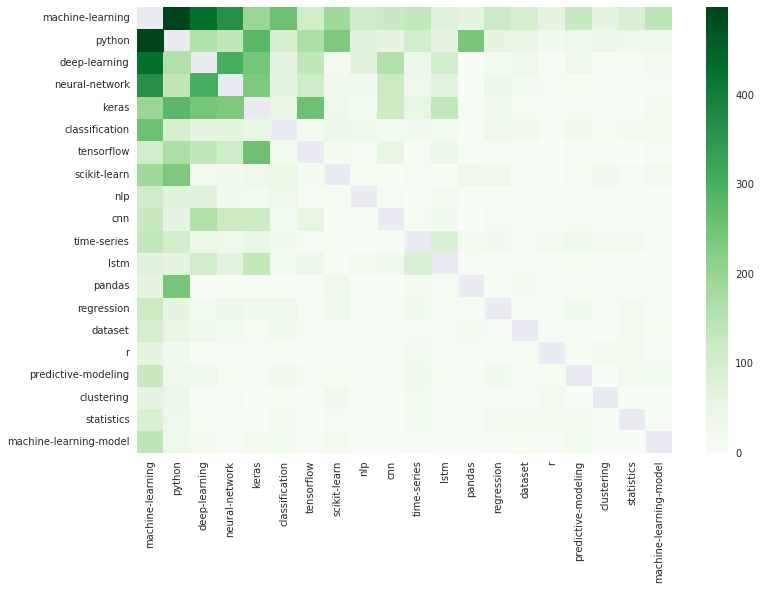

In [18]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are.

We won't get into the details of it, as the technique is out of scope for this project.

# Enter Domain Knowledge

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

# Is Deep Learning Just a Fad?

Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down?

The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;

In [19]:
questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
questions.head(3)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>


After parsed the dates in `CreationDate` column, let's again convert the values in the `Tags` column to a more suitable format

In [20]:
questions['Tags'] = questions['Tags'].str.replace("><", ",").str.replace("^<|>$", "").str.split(",")
questions.head(3)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [21]:
deep_learn_tags = ["lstm", "cnn", "scikit-learn", 
                   "tensorflow", "keras", 
                   "neural-network", "deep-learning"]
def deeplearnquest(tags):
    for tag in tags:
        if tag in deep_learn_tags:
            return 1
        else:
            continue
        
questions['deep_learning'] = questions['Tags'].apply(deeplearnquest)
questions['deep_learning'].fillna(0, inplace=True)
questions['deep_learning'] = questions['deep_learning'].astype('int')
questions.head(10)

,Id,CreationDate,Tags,deep_learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


Now, we need to define an adequate timeframe. So, first we'll check the whole period we have:

In [22]:
questions_dates = questions.sort_values(by='CreationDate')
questions_dates.head()

,Id,CreationDate,Tags,deep_learning
65,5,2014-05-13 23:58:30,[machine-learning],0
66,7,2014-05-14 00:11:06,"[education, open-source]",0
67,14,2014-05-14 01:25:59,"[data-mining, definitions]",0
68,15,2014-05-14 01:41:23,[databases],0
69,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]",0


In [23]:
questions_dates.tail()

,Id,CreationDate,Tags,deep_learning
21320,66684,2020-01-18 21:17:34,"[machine-learning, python, matplotlib, csv]",0
21321,66685,2020-01-18 23:56:27,"[machine-learning, nlp, named-entity-recognition]",0
21322,66686,2020-01-19 00:49:00,"[data-mining, bigdata, association-rules]",0
21323,66690,2020-01-19 02:21:53,"[keras, gan]",1
21324,66691,2020-01-19 03:01:03,"[python, pandas, anaconda, statsmodels]",0


It seems we have a period that comprises May-2014 until Jan-2020.
To avoid facing "holes" in our period and misinterpretation of the data, let's check how the dates of questions are distributed:

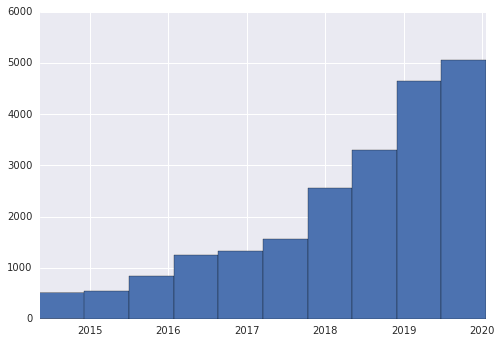

In [24]:
questions['CreationDate'].hist()
plt.show()

Thus, the number of questions is growing through time and there are no apparent "holes" in our period.

Now, considering this date range we'll pick a **quarterly** frequency as the timeframe. Following, we'll count how many deep learning questions are asked per time period.

Let's first remove all data of 2020, as we have few questions in this period.

In [25]:
import datetime as dt
questions = questions[questions['CreationDate'].dt.year < 2020]

In [26]:
def extract_year_quarter(dt):
    quarter = ((dt.month-1) // 3) + 1
    return "{y}Q{q}".format(y=dt.year, q=quarter)

questions['Quarter'] = questions['CreationDate'].apply(extract_year_quarter)

Let's track interest in deep learning across that timeframe:
 - Counting how many deep learning questions are asked per time period;
 - The total amount of questions per time period;
 - How many deep learning questions there are relative to the total amount of questions per time period.

In [37]:
#Counting how many deep learning questions are asked per time period
nr_of_dlq = questions.groupby('Quarter').sum()['deep_learning']
nr_of_dlq

Quarter
2014Q2      9
2014Q3     13
2014Q4     21
2015Q1     18
2015Q2     28
2015Q3     45
2015Q4     66
2016Q1    110
2016Q2    109
2016Q3    161
2016Q4    177
2017Q1    242
2017Q2    226
2017Q3    247
2017Q4    353
2018Q1    554
2018Q2    566
2018Q3    685
2018Q4    531
2019Q1    804
2019Q2    935
2019Q3    941
2019Q4    809
Name: deep_learning, dtype: int64

In [28]:
nr_of_questions = questions.groupby('Quarter').count()['Tags']
nr_of_questions

Quarter
2014Q2     157
2014Q3     189
2014Q4     216
2015Q1     190
2015Q2     284
2015Q3     311
2015Q4     382
2016Q1     516
2016Q2     518
2016Q3     585
2016Q4     527
2017Q1     698
2017Q2     647
2017Q3     714
2017Q4     898
2018Q1    1221
2018Q2    1448
2018Q3    1512
2018Q4    1294
2019Q1    1987
2019Q2    2393
2019Q3    2394
2019Q4    2036
Name: Tags, dtype: int64

In [29]:
nr_of_dlq_pct = nr_of_dlq / nr_of_questions
nr_of_dlq_pct

Quarter
2014Q2    0.057325
2014Q3    0.068783
2014Q4    0.097222
2015Q1    0.094737
2015Q2    0.098592
2015Q3    0.144695
2015Q4    0.172775
2016Q1    0.213178
2016Q2    0.210425
2016Q3    0.275214
2016Q4    0.335863
2017Q1    0.346705
2017Q2    0.349304
2017Q3    0.345938
2017Q4    0.393096
2018Q1    0.453726
2018Q2    0.390884
2018Q3    0.453042
2018Q4    0.410355
2019Q1    0.404630
2019Q2    0.390723
2019Q3    0.393066
2019Q4    0.397348
dtype: float64

In [41]:
# Converting all these Series above into a DataFrame:
quarterly = nr_of_dlq.to_frame()
quarterly['Questions'] = nr_of_questions
quarterly['Deep Learning Rate'] = nr_of_dlq_pct
quarterly.reset_index(inplace=True)
quarterly.head(3)

,Quarter,deep_learning,Questions,Deep Learning Rate
0,2014Q2,9,157,0.057325
1,2014Q3,13,189,0.068783
2,2014Q4,21,216,0.097222


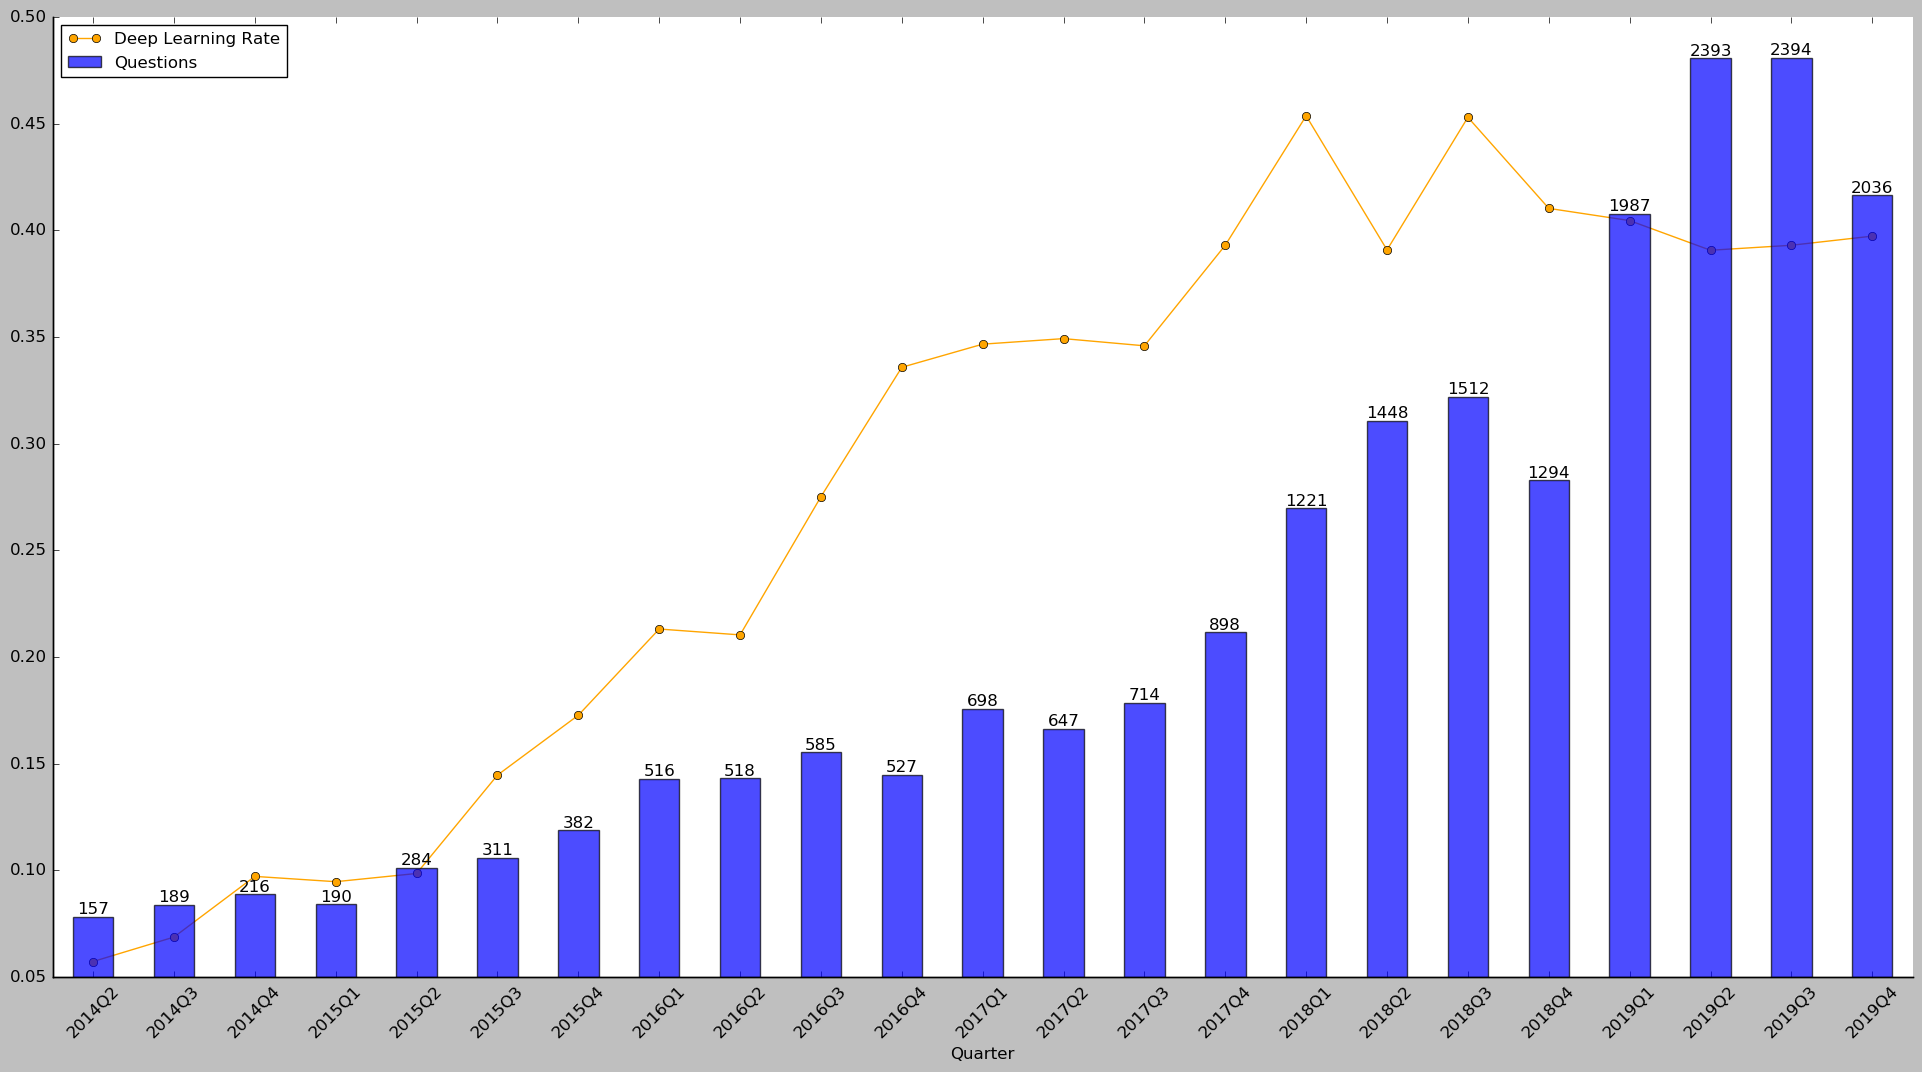

In [47]:
plt.style.use('default')
ax1 = quarterly.plot(x='Quarter', y='Deep Learning Rate', kind='line',
                     linestyle='-', marker='o', color='orange',
                     figsize=(24,12))
ax2 = quarterly.plot(x='Quarter', y='Questions', kind='bar', ax=ax1,
                     secondary_y=True, alpha=0.7, rot=45, color='blue')

for idx, q in quarterly['Questions'].iteritems():
    ax2.text(idx, q, str(q), ha='center', va='bottom')
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc='upper left', prop={'size': 12})

for ax in (ax1, ax2):
    for where in ('top', 'right'):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing the creation of deep learning content.